In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
#cargo primero los datos
file_dir = 'Datos/RiesgoBariloche'
data = pd.read_csv(file_dir,sep=",",usecols=["incidenciaAcum14d"],quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [5]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [69]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=100,activation='relu',input_shape=(lag,1))))
model.add(keras.layers.Dense(units=1))
optimizer = keras.optimizers.Adam(5e-2)
model.compile(optimizer,loss=keras.losses.MSE,metrics=['mse']) #metrics=['mean_absolute_percentage_error']
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=16,verbose=2)

Train on 247 samples, validate on 59 samples
Epoch 1/500
 - 1s - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 2/500
 - 0s - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3/500
 - 0s - loss: 8.4552e-04 - mse: 8.4552e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 4/500
 - 0s - loss: 7.8038e-04 - mse: 7.8038e-04 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 5/500
 - 0s - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 6/500
 - 0s - loss: 6.2093e-04 - mse: 6.2093e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 7/500
 - 0s - loss: 3.7194e-04 - mse: 3.7194e-04 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 8/500
 - 0s - loss: 2.3675e-04 - mse: 2.3675e-04 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 9/500
 - 0s - loss: 2.2049e-04 - mse: 2.2049e-04 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 10/500
 - 0s - loss: 2.8182e-04 - mse: 2.8182e-04 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 11/500
 - 0s - loss: 2.0752e-04 - mse: 2.0752e-04 - 

 - 0s - loss: 6.1862e-04 - mse: 6.1862e-04 - val_loss: 2.5244e-04 - val_mse: 2.5244e-04
Epoch 87/500
 - 0s - loss: 1.9542e-04 - mse: 1.9542e-04 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 88/500
 - 0s - loss: 1.3217e-04 - mse: 1.3217e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 89/500
 - 0s - loss: 1.3121e-04 - mse: 1.3121e-04 - val_loss: 3.5596e-04 - val_mse: 3.5596e-04
Epoch 90/500
 - 0s - loss: 9.0837e-05 - mse: 9.0837e-05 - val_loss: 6.4879e-04 - val_mse: 6.4879e-04
Epoch 91/500
 - 0s - loss: 1.8994e-04 - mse: 1.8994e-04 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 92/500
 - 0s - loss: 2.4977e-04 - mse: 2.4977e-04 - val_loss: 5.0749e-04 - val_mse: 5.0749e-04
Epoch 93/500
 - 0s - loss: 9.9435e-05 - mse: 9.9435e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 94/500
 - 0s - loss: 8.4314e-05 - mse: 8.4314e-05 - val_loss: 7.6848e-04 - val_mse: 7.6848e-04
Epoch 95/500
 - 0s - loss: 5.0351e-05 - mse: 5.0351e-05 - val_loss: 4.0050e-04 - val_mse: 4.0050e-04
Epoch 96/500
 - 0s - loss: 5.1562e-

Epoch 171/500
 - 0s - loss: 7.6539e-05 - mse: 7.6539e-05 - val_loss: 7.0771e-04 - val_mse: 7.0771e-04
Epoch 172/500
 - 0s - loss: 4.6119e-05 - mse: 4.6119e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 173/500
 - 0s - loss: 6.0271e-05 - mse: 6.0271e-05 - val_loss: 8.1860e-04 - val_mse: 8.1860e-04
Epoch 174/500
 - 0s - loss: 5.0493e-05 - mse: 5.0493e-05 - val_loss: 6.4594e-04 - val_mse: 6.4594e-04
Epoch 175/500
 - 0s - loss: 4.5457e-05 - mse: 4.5457e-05 - val_loss: 7.9294e-04 - val_mse: 7.9294e-04
Epoch 176/500
 - 0s - loss: 5.8328e-05 - mse: 5.8328e-05 - val_loss: 7.5423e-04 - val_mse: 7.5423e-04
Epoch 177/500
 - 0s - loss: 1.7852e-04 - mse: 1.7852e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 178/500
 - 0s - loss: 2.4947e-04 - mse: 2.4947e-04 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 179/500
 - 0s - loss: 2.0612e-04 - mse: 2.0612e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 180/500
 - 0s - loss: 1.9388e-04 - mse: 1.9388e-04 - val_loss: 2.1088e-04 - val_mse: 2.1088e-04
Epoch 181/50

Epoch 256/500
 - 0s - loss: 4.7683e-04 - mse: 4.7683e-04 - val_loss: 7.8050e-04 - val_mse: 7.8050e-04
Epoch 257/500
 - 0s - loss: 1.8998e-04 - mse: 1.8998e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 258/500
 - 0s - loss: 1.2098e-04 - mse: 1.2098e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 259/500
 - 0s - loss: 1.6982e-04 - mse: 1.6982e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 260/500
 - 0s - loss: 6.9307e-05 - mse: 6.9307e-05 - val_loss: 3.5848e-04 - val_mse: 3.5848e-04
Epoch 261/500
 - 0s - loss: 4.9727e-05 - mse: 4.9727e-05 - val_loss: 5.8506e-04 - val_mse: 5.8506e-04
Epoch 262/500
 - 0s - loss: 5.8540e-05 - mse: 5.8540e-05 - val_loss: 7.0737e-04 - val_mse: 7.0737e-04
Epoch 263/500
 - 0s - loss: 6.1491e-05 - mse: 6.1491e-05 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 264/500
 - 0s - loss: 3.1872e-04 - mse: 3.1872e-04 - val_loss: 7.5352e-04 - val_mse: 7.5352e-04
Epoch 265/500
 - 0s - loss: 1.3911e-04 - mse: 1.3911e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 266/500
 - 0s 

Epoch 341/500
 - 0s - loss: 5.7480e-05 - mse: 5.7480e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 342/500
 - 0s - loss: 7.1703e-05 - mse: 7.1703e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 343/500
 - 0s - loss: 7.8392e-05 - mse: 7.8392e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 344/500
 - 0s - loss: 5.5723e-05 - mse: 5.5723e-05 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 345/500
 - 0s - loss: 6.7057e-05 - mse: 6.7057e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 346/500
 - 0s - loss: 6.0931e-05 - mse: 6.0931e-05 - val_loss: 5.9045e-04 - val_mse: 5.9045e-04
Epoch 347/500
 - 0s - loss: 7.8914e-05 - mse: 7.8914e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 348/500
 - 0s - loss: 6.9088e-05 - mse: 6.9088e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 349/500
 - 0s - loss: 9.7982e-05 - mse: 9.7982e-05 - val_loss: 7.9140e-04 - val_mse: 7.9140e-04
Epoch 350/500
 - 0s - loss: 6.5943e-05 - mse: 6.5943e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 351/500
 - 0s - loss: 6.4601e-05 - mse

 - 0s - loss: 7.4191e-05 - mse: 7.4191e-05 - val_loss: 7.0354e-04 - val_mse: 7.0354e-04
Epoch 425/500
 - 0s - loss: 5.8141e-05 - mse: 5.8141e-05 - val_loss: 4.5664e-04 - val_mse: 4.5664e-04
Epoch 426/500
 - 0s - loss: 4.5770e-05 - mse: 4.5770e-05 - val_loss: 3.5314e-04 - val_mse: 3.5314e-04
Epoch 427/500
 - 0s - loss: 5.8226e-05 - mse: 5.8226e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 428/500
 - 0s - loss: 4.4195e-05 - mse: 4.4195e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 429/500
 - 0s - loss: 4.5769e-05 - mse: 4.5769e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 430/500
 - 0s - loss: 4.5152e-05 - mse: 4.5152e-05 - val_loss: 8.6148e-04 - val_mse: 8.6148e-04
Epoch 431/500
 - 0s - loss: 4.0285e-05 - mse: 4.0285e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 432/500
 - 0s - loss: 4.3122e-05 - mse: 4.3122e-05 - val_loss: 8.2401e-04 - val_mse: 8.2401e-04
Epoch 433/500
 - 0s - loss: 5.9635e-05 - mse: 5.9635e-05 - val_loss: 6.9951e-04 - val_mse: 6.9951e-04
Epoch 434/500
 - 0s - loss

In [70]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [71]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [72]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict))) 
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) 

train mse squared: 121.1127365318461
test mse squared: 461.0802151124667


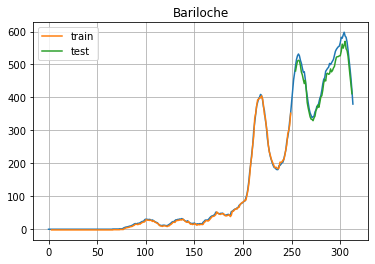

In [73]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Bariloche')
plt.legend()
plt.show()

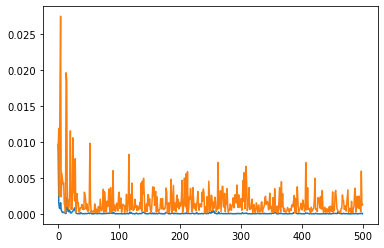

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])